# **Overview**

In this project, we'll examine how NBA teams triumph and identify the elements of the match that contributed to their victory. The database includes player profiles, over 25,000 game statistics, club rankings going back to 2003, and details on each of the 30 NBA teams.

# **The Goals**

1. Find out which factors contribute to a team's success and whether they have a better chance of winning at home.
2. Examine the differences in the teams' performances during home and away games.
3. Examine whether the capacity of the arena could aid in the victory of the home team.


# **Importing Libraries, Functions, and Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

: 

# **Data Import and Synopsis**

Data is seperated in five datasets; Game information and statistics, Player informations, Team ranking, Team informations. This notebook primarily uses data from the game information.

In [5]:
games_df = pd.read_csv('games.csv')
game_deets_df = pd.read_csv('games_details.csv', low_memory=False)
players_df = pd.read_csv('players.csv')
ranking_df = pd.read_csv('ranking.csv')
teams_df = pd.read_csv('teams.csv')
games_df['GAME_DATE_EST']= pd.to_datetime(games_df['GAME_DATE_EST'])
pd.set_option('display.max_columns',21)

def get_mean(group, column):
    return group[column].mean()
def get_2mean(df,first,second):
    return (df[first]/df[second]).mean()
def get_2median(df,first,second):
    return (df[first]/df[second]).median()

In [6]:
print(f'Game details has {game_deets_df.shape[0]} rows and {game_deets_df.shape[1]} columns')
print(f'Team games has {games_df.shape[0]} rows and {games_df.shape[1]} columns')
print(f'Player informations has {players_df.shape[0]} rows and {players_df.shape[1]} columns')
print(f'Team ranking has {ranking_df.shape[0]} rows and {ranking_df.shape[1]} columns')
print(f'Team information has {teams_df.shape[0]} rows and {teams_df.shape[1]} columns')

Game details has 66676 rows and 29 columns
Team games has 26651 rows and 21 columns
Player informations has 7228 rows and 4 columns
Team ranking has 127772 rows and 13 columns
Team information has 30 rows and 14 columns


In [7]:
wl_group = games_df.groupby(['HOME_TEAM_WINS'])

win_filt = wl_group.get_group(1)
lose_filt = wl_group.get_group(0)

reb_grp = games_df.groupby(['REB_home','HOME_TEAM_WINS'])
reb_table = reb_grp.size().unstack(fill_value=0)
losereb_grp = games_df.groupby(['REB_away','HOME_TEAM_WINS'])
losereb_table = losereb_grp.size().unstack(fill_value=0)
ast_grp = games_df.groupby(['AST_home','HOME_TEAM_WINS'])
mean_w_reb = get_mean(win_filt,'REB_home')
ast_table= ast_grp.size().unstack(fill_value=0)
lose_ast_grp = games_df.groupby(['AST_away','HOME_TEAM_WINS'])
lose_ast_table = lose_ast_grp.size().unstack(fill_value=0)
fgpct_grp = games_df.groupby(['FG_PCT_home','HOME_TEAM_WINS'])
fgpct_table = fgpct_grp.size().unstack(fill_value=0)
fgpct_grp_lose = games_df.groupby(['FG_PCT_away','HOME_TEAM_WINS'])
fgpct_away_table = fgpct_grp_lose.size().unstack(fill_value=0)
fg3pct_grp= games_df.groupby(['FG3_PCT_home','HOME_TEAM_WINS'])
fg3pct_table = fg3pct_grp.size().unstack(fill_value=0)
fg3pct_grp_lose = games_df.groupby(['FG3_PCT_away','HOME_TEAM_WINS'])
fg3pct_away_table = fg3pct_grp_lose.size().unstack(fill_value=0)
ast_reb_grp = games_df.groupby(['AST_home','REB_home','HOME_TEAM_WINS'])
ast_reb_table = ast_reb_grp.size().unstack(fill_value=0)
teams_grp = games_df.groupby(['HOME_TEAM_ID','HOME_TEAM_WINS'])
most_win_table = teams_grp['HOME_TEAM_WINS'].size().unstack(fill_value=0)
teams_df.sort_values(by='TEAM_ID',ascending = True,inplace = True)
most_win_table.sort_values(by='HOME_TEAM_ID',ascending = True,inplace = True)
most_win_table['NAME'] = teams_df['NICKNAME'].values
most_win_table['ARENA_CAP'] = teams_df['ARENACAPACITY'].values
most_win_table.sort_values(by='ARENA_CAP',ascending = False,inplace = True)


# **Data Exploration and Vizualization**

We will start with finding out the probability of teams winning home games as opposed to losing home games.

In [8]:
pct_home_win = games_df['HOME_TEAM_WINS'].value_counts()/len(games_df) * 100
print(f'Teams are likely to win {pct_home_win[1]:.2f}% during home games, and lose {pct_home_win[0]:.2f}% during home games')

Teams are likely to win 58.70% during home games, and lose 41.30% during home games


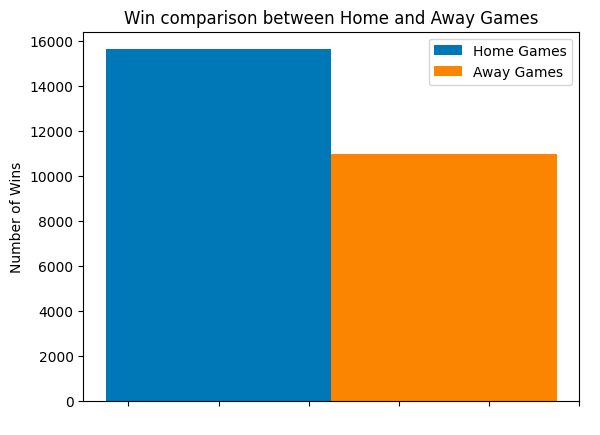

In [9]:
# do teams perform better when at home stadium?
#groupings and bar plot
x = win_filt['HOME_TEAM_WINS'].value_counts()
y = lose_filt['HOME_TEAM_WINS'].value_counts()

ti = [0.5]
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = 'Home Games')
plt.bar(hor + 0.75,y,width = 0.25,color = '#fb8500',label = 'Away Games')

plt.ylabel('Number of Wins')
plt.xticks(color = 'w')
plt.title('Win comparison between Home and Away Games')
plt.legend()

The correlation between winning and losing in home and away games is displayed on this graph. It is obvious that winning at home has a higher probability of success than winning away. This might result from:

1. Underlying statistics (ex: field goal percentage, number of assists)
2. Home game advantage (arena capacity)

Let us examine the statistics that could have caused the probability of winning more home games than winning away games

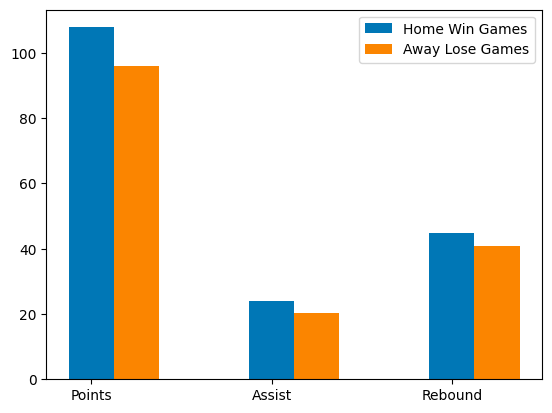

In [10]:
x = [get_mean(win_filt,'PTS_home'),get_mean(win_filt,'AST_home'),
     get_mean(win_filt,'REB_home')]
y = [get_mean(win_filt,'PTS_away'),get_mean(win_filt,'AST_away'),
     get_mean(win_filt,'REB_away')]

ti = ['Points','Assist','Rebound']
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = 'Home Win Games')
plt.bar(hor + 0.25,y,width = 0.25,color = '#fb8500',label = 'Away Lose Games')
plt.legend()

We could see in the graph above that home win games has more points, more assists, and more rebounds.

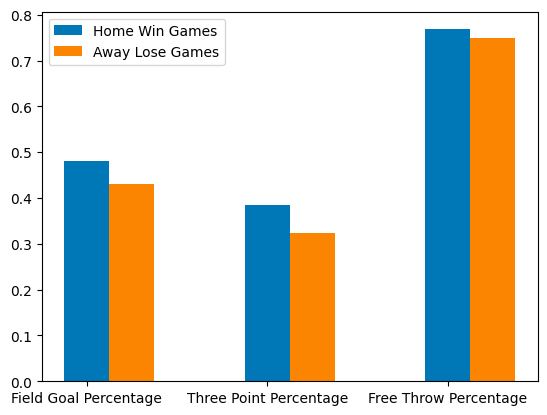

In [ ]:
# plotting using the bar graph the difference between the fg pct and 3pt fg pct of home and away games
x = [get_mean(win_filt,'FG_PCT_home'),get_mean(win_filt,'FG3_PCT_home'),
    get_mean(win_filt,'FT_PCT_home')]
y = [get_mean(win_filt,'FG_PCT_away'),get_mean(win_filt,'FG3_PCT_away'),
    get_mean(win_filt,'FT_PCT_away')]
ti = ['Field Goal Percentage','Three Point Percentage','Free Throw Percentage']
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = 'Home Win Games')
plt.bar(hor + 0.25,y,width = 0.25,color = '#fb8500',label = 'Away Lose Games')
plt.legend()

The same could be said in terms of the field goal percentage, three point percentage, and free throw percentage.

We could get the conclusion that the team's performance, including field goal percentage, three-point percentage, points allowed, assists made, and rebounds made, significantly changes when they play at home. Let's contrast the statistics of the teams that won the home and away games, nevertheless, to support this assertion.

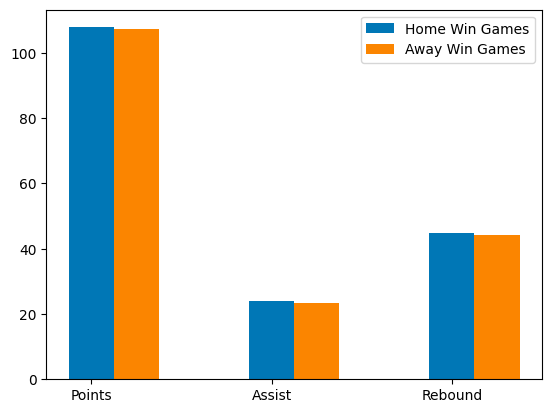

In [11]:
x = [get_mean(win_filt,'PTS_home'),get_mean(win_filt,'AST_home'),
    get_mean(win_filt,'REB_home')]
y = [get_mean(lose_filt,'PTS_away'),get_mean(lose_filt,'AST_away'),
    get_mean(lose_filt,'REB_away')]

ti = ['Points','Assist','Rebound']
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = 'Home Win Games')
plt.bar(hor + 0.25,y,width = 0.25,color = '#fb8500',label = 'Away Win Games')
plt.legend()

In the graph above, we could notice that the points, assists made, and rebounds made are almost identical.

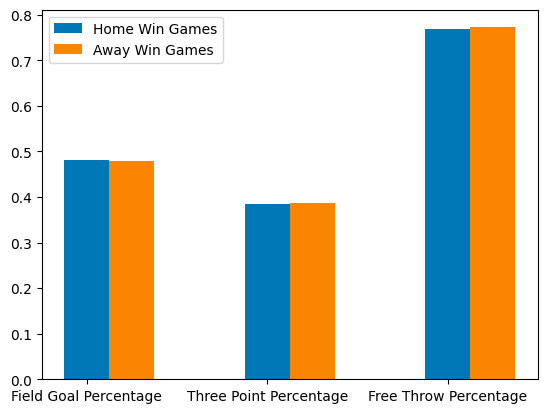

In [ ]:
x = [get_mean(win_filt,'FG_PCT_home'),get_mean(win_filt,'FG3_PCT_home'),
    get_mean(win_filt,'FT_PCT_home')]
y = [get_mean(lose_filt,'FG_PCT_away'),get_mean(lose_filt,'FG3_PCT_away'),
    get_mean(lose_filt,'FT_PCT_away')]

ti = ['Field Goal Percentage','Three Point Percentage','Free Throw Percentage']
hor = np.arange(len(ti))

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = 'Home Win Games')
plt.bar(hor + 0.25,y,width = 0.25,color = '#fb8500',label = 'Away Win Games')
plt.legend()

based on both of these graph, we could conclude that both the winners of home games and winners of away games have identical stats.

Let's determine which of these statistics helped the team win more games.

<function matplotlib.pyplot.show(close=None, block=None)>

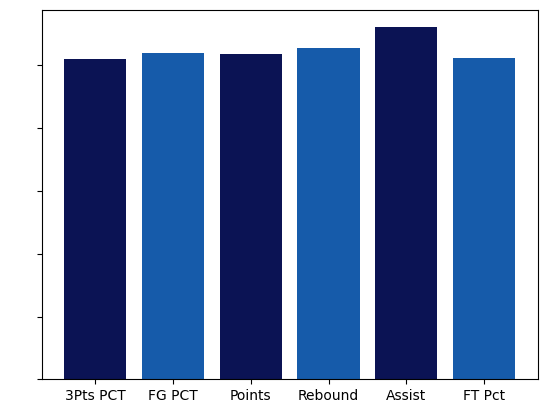

In [12]:
fg_3pct = get_2median(games_df,'FG3_PCT_home','FG3_PCT_away')
fg_pct = get_2mean(games_df,'FG_PCT_home','FG_PCT_away')
pts_allowed = get_2mean(games_df,'PTS_home','PTS_away')
reb = get_2mean(games_df,'REB_home','REB_away')
ast = get_2mean(games_df,'AST_home','AST_away')
free_throw = get_2mean(games_df,'FT_PCT_home','FT_PCT_away')

#making the plot
x = [fg_3pct,fg_pct,pts_allowed,reb,ast,free_throw]
y = ['3Pts PCT','FG PCT','Points','Rebound','Assist','FT Pct']

plt.yticks(color = 'w')
plt.bar(y,x,color = ['#0b1354','#165baa'])
plt.show

We can see that winning games may depend more on who has more assists. Rebounds made, points made, field goal %, three-point percentage, and free throw percentage come next.

In [ ]:
# how much assists is it more likely to win
ast_grp = games_df.groupby(['AST_home','HOME_TEAM_WINS'])

mean_w_ast = get_mean(win_filt,'AST_home')
mean_l_ast = get_mean(lose_filt,'AST_home')
ptdif_w_ast = get_mean(win_filt,'PTS_home') - get_mean(win_filt,'PTS_away')

mean_w_reb = get_mean(win_filt,'REB_home')
mean_l_reb = get_mean(lose_filt,'REB_home')
ptdif_w_reb = win_filt['REB_home'] - win_filt['REB_away']
print(f' the mean amount of assists made by teams who won home games is {mean_w_ast:.0f}, and the mean amount of assists made by teams who lost home games is {mean_l_ast:.0f}')
print(f' the mean amount of rebounds made by teams who won home games is {mean_w_reb:.0f}, and the mean amount of rebounds made by teams who lost home games is {mean_l_reb:.0f}')

 the mean amount of assists made by teams who won home games is 24, and the mean amount of assists made by teams who lost home games is 21
 the mean amount of rebounds made by teams who won home games is 45, and the mean amount of rebounds made by teams who lost home games is 41


Comparing the metrics of players who won and lost at home with those who won and lost away can help us go further into these numbers. Let's start by looking at the rebounds that players who won and lost at home and away made.

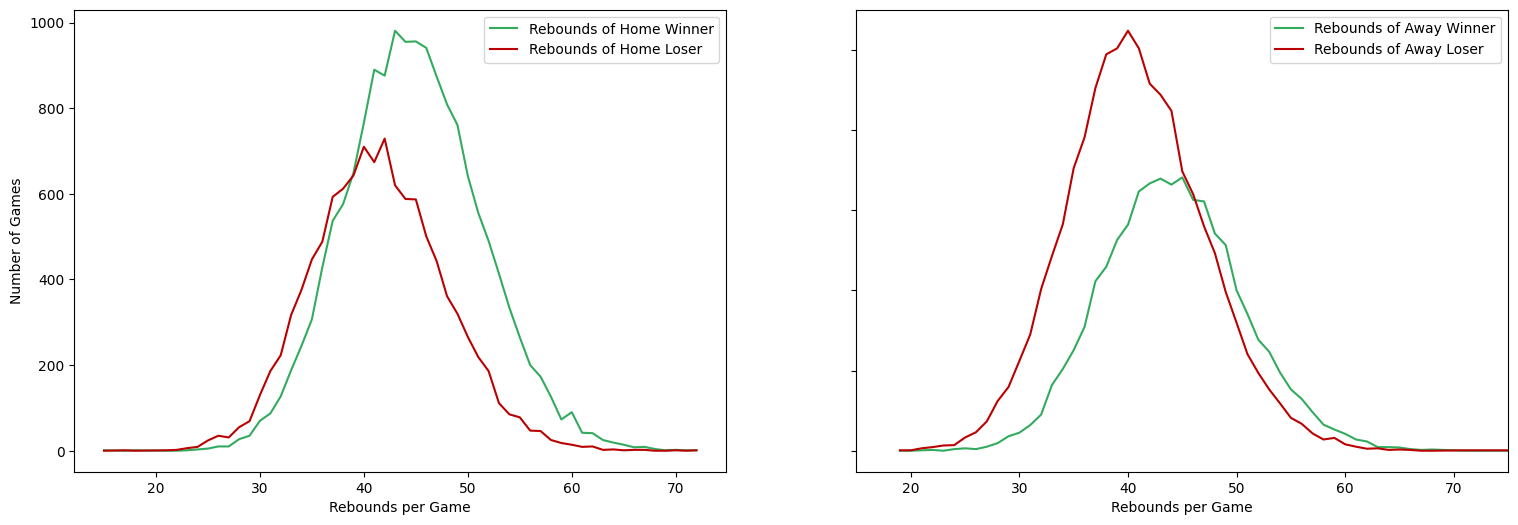

In [ ]:
# compare it with rebounds of loser and winner
reb_grp = games_df.groupby(['REB_home','HOME_TEAM_WINS'])
reb_table = reb_grp.size().unstack(fill_value=0)

# assigning the amount of rebounds the winner and loser has
plt.subplot(1,2,1)
plt.plot(reb_table[1], color = '#33AB5F',label = 'Rebounds of Home Winner')
plt.plot(reb_table[0], color = '#BA0001',label = 'Rebounds of Home Loser')

plt.ylabel('Number of Games')
plt.xlabel('Rebounds per Game')
plt.legend()

# compare the results from those who won and lost during home and away games
plt.subplot(1,2,2)
losereb_grp = games_df.groupby(['REB_away','HOME_TEAM_WINS'])
losereb_table = losereb_grp.size().unstack(fill_value=0)

plt.plot(losereb_table[0], color = '#33AB5F',label = 'Rebounds of Away Winner')
plt.plot(losereb_table[1], color = '#BA0001',label = 'Rebounds of Away Loser')

plt.yticks(c='w')
plt.xlim([15,75])
fig = plt.gcf()
fig.set_size_inches(18.5,6)
plt.xlabel('Rebounds per Game')
plt.legend()

The first graph (left) shows that a team's chances of winning increase with the number of rebounds they grab. It also translates to the average amount of rebounds scored by home winners, which is 44 per game, compared to 41.4 for home losers.

The second graph (right) illustrates the correlation between a team's likelihood of losing away from home and their rebounding percentage. The winner of road games averages 44 rebounds per game, while the losers of away games average 40.7 rebounds.

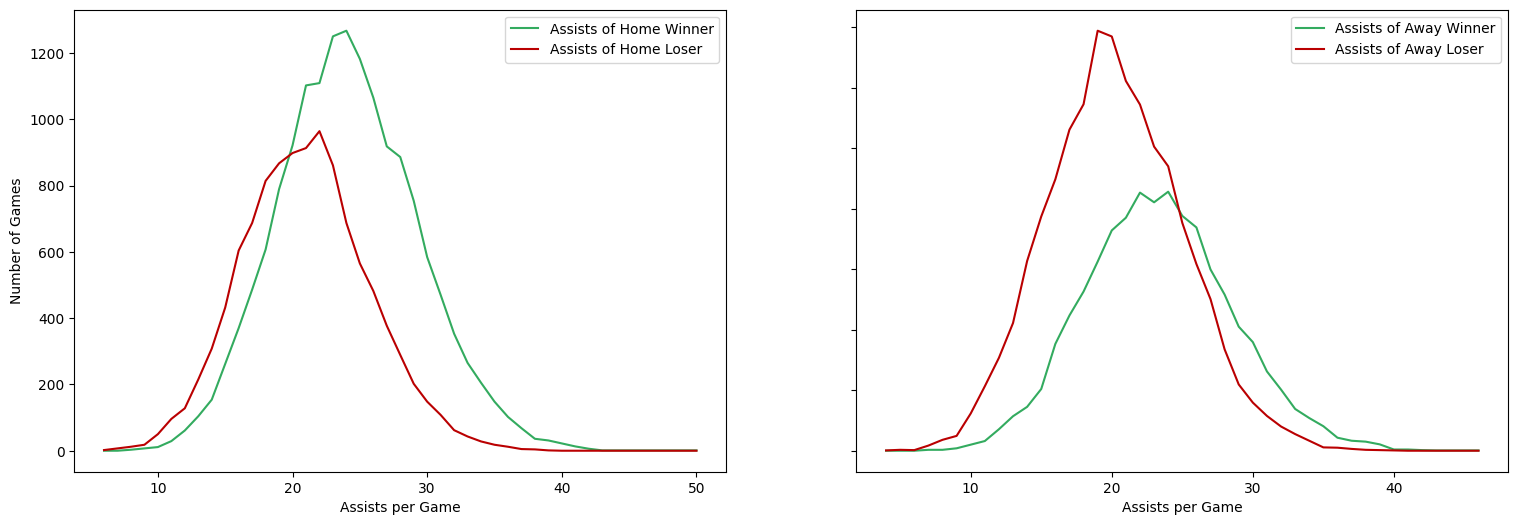

In [ ]:
# grouped the home team wins with the 0 and 1 (could do this with everything else)
ast_table= ast_grp.size().unstack(fill_value=0)

#plot it using line graph
plt.subplot(1,2,1)

plt.plot(ast_table[1], color = '#33AB5F',label = 'Assists of Home Winner')
plt.plot(ast_table[0], color = '#BA0001',label = 'Assists of Home Loser')

plt.xlabel('Assists per Game')
plt.ylabel('Number of Games')
plt.legend()

# compare the results from those who won and lose during an away game
plt.subplot(1,2,2)
lose_ast_grp = games_df.groupby(['AST_away','HOME_TEAM_WINS'])
lose_ast_table = lose_ast_grp.size().unstack(fill_value=0)

plt.plot(lose_ast_table[0], color = '#33AB5F',label = 'Assists of Away Winner')
plt.plot(lose_ast_table[1], color = '#BA0001',label = 'Assists of Away Loser')

plt.yticks(c='w')
plt.xlabel('Assists per Game')
fig = plt.gcf()
fig.set_size_inches(18.5,6)
plt.legend()

The first graph (left) illustrates that a team's chances of winning increase with the number of assists. Teams that have won at home have averaged 24.05 assists per game, while those that have lost have averaged 20.85 assists.

It is also true that teams who win games on the road have a higher chance of winning if they have more assists than their opponents. In away games, winners often have 23.22 assists, while losers typically have 20.14 assists.

This backs with our assertion that a team's odds of winning rise with the number of rebounds and assists they rack up during a game.

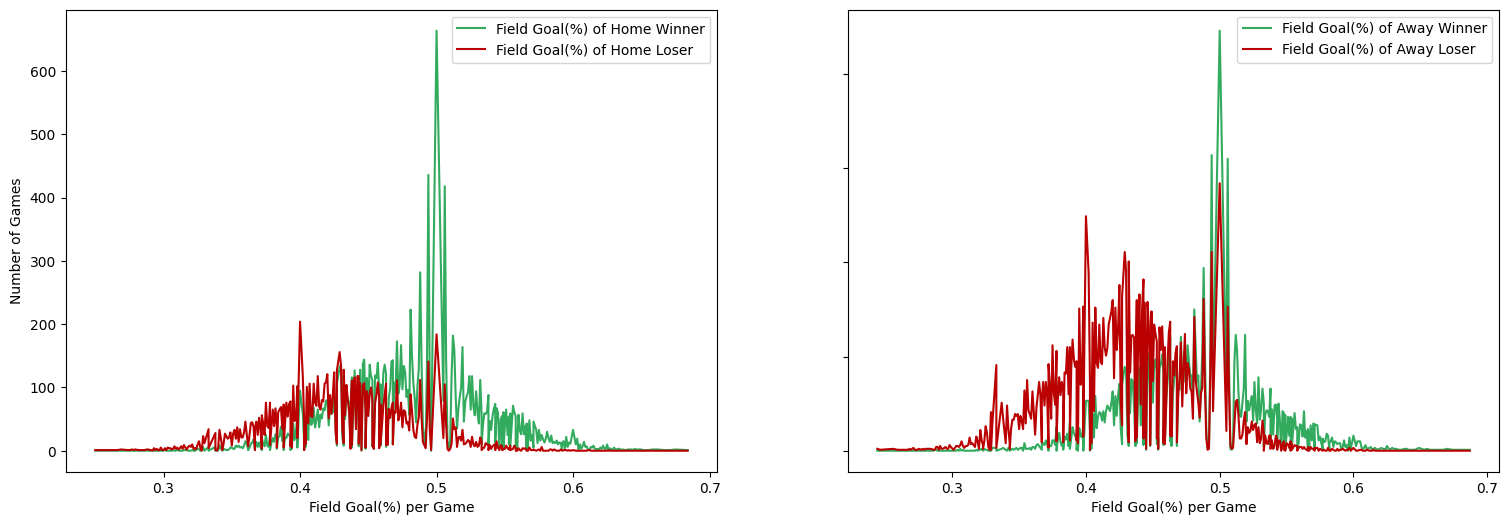

In [ ]:
#grouping and making the table for fg pct and 3ptpct
fgpct_grp = games_df.groupby(['FG_PCT_home','HOME_TEAM_WINS'])
fgpct_table = fgpct_grp.size().unstack(fill_value=0)
fgpct_grp_lose = games_df.groupby(['FG_PCT_away','HOME_TEAM_WINS'])
fgpct_away_table = fgpct_grp_lose.size().unstack(fill_value=0)

fg3pct_grp= games_df.groupby(['FG3_PCT_home','HOME_TEAM_WINS'])
fg3pct_table = fg3pct_grp.size().unstack(fill_value=0)
fg3pct_grp_lose = games_df.groupby(['FG3_PCT_away','HOME_TEAM_WINS'])
fg3pct_away_table = fg3pct_grp_lose.size().unstack(fill_value=0)

plt.subplot(1,2,1)

plt.plot(fgpct_table[1], color = '#33AB5F',label = 'Field Goal(%) of Home Winner')
plt.plot(fgpct_table[0], color = '#BA0001',label = 'Field Goal(%) of Home Loser')

plt.xlabel('Field Goal(%) per Game')
plt.ylabel('Number of Games')
plt.legend(loc = 'upper right')

plt.subplot(1,2,2)

plt.plot(fgpct_away_table[0], color = '#33AB5F',label = 'Field Goal(%) of Away Winner')
plt.plot(fgpct_away_table[1], color = '#BA0001',label = 'Field Goal(%) of Away Loser')

plt.yticks(c='w')
fig = plt.gcf()
fig.set_size_inches(18.5,6)
plt.xlabel('Field Goal(%) per Game')
plt.legend(loc = 'upper right')

We compared the field goal % of winning and losing teams from home and away games in these two graphs. A FG% of 50 would virtually ensure a victory in home games, as our first graph illustrates.

Even with a 50% field goal percentage when playing away from home, there is still a possibility to win, but the likelihood increases dramatically with more assists or rebounds.

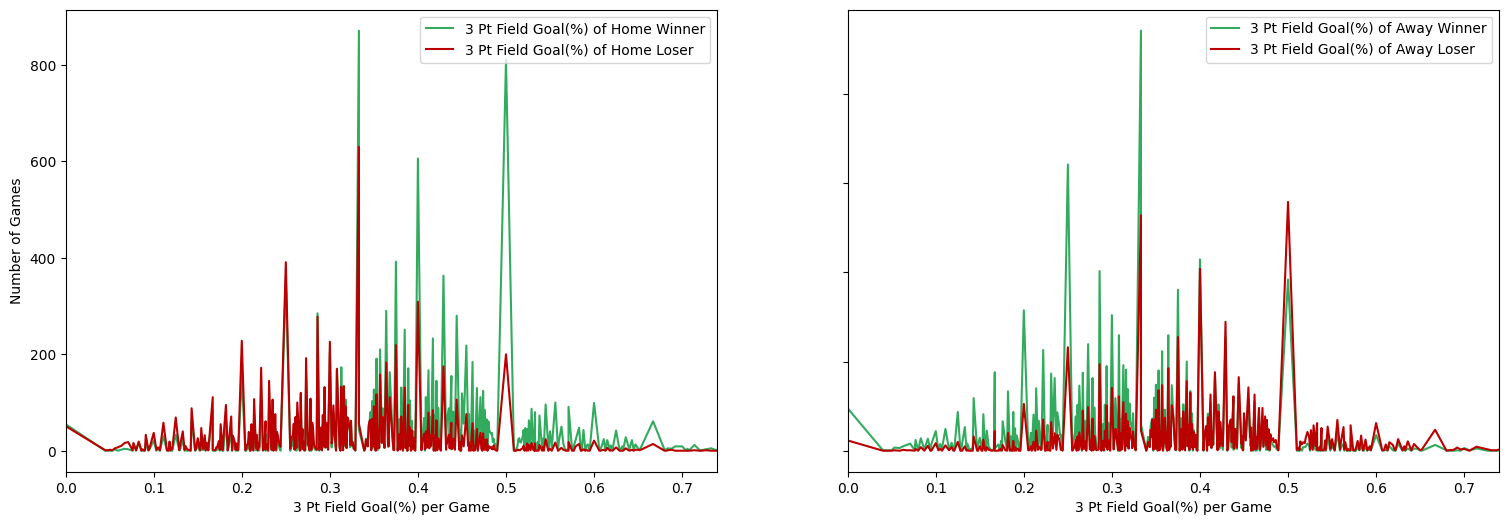

In [ ]:
# plot fg pct
plt.subplot(1,2,1)

plt.plot(fg3pct_table[1], color = '#33AB5F',label = '3 Pt Field Goal(%) of Home Winner')
plt.plot(fg3pct_table[0], color = '#BA0001',label = '3 Pt Field Goal(%) of Home Loser')

plt.xlabel('3 Pt Field Goal(%) per Game')
plt.ylabel('Number of Games')
plt.legend(loc = 'upper right')
plt.xlim([0,0.74])
#plot 3pt pct
plt.subplot(1,2,2)

plt.plot(fg3pct_away_table[1], color = '#33AB5F',label = '3 Pt Field Goal(%) of Away Winner')
plt.plot(fg3pct_away_table[0], color = '#BA0001',label = '3 Pt Field Goal(%) of Away Loser')

plt.yticks(c='w')
plt.xlim([0,0.74])
fig = plt.gcf()
fig.set_size_inches(18.5,6)
plt.xlabel('3 Pt Field Goal(%) per Game')
plt.legend(loc = 'upper right')

The three point percentage differential between the teams that won and lost their home and away games is displayed in the two graphs above. The initial graph (on the left) illustrates that the percentages of 50, 40, and 30 have the highest number of winners in home games. A team's odds of winning rise when they shoot a 50% three-point field goal.

Teams that had a 50% three-point field goal percentage were more likely to lose, according to the second graph (right). This can be a sign that other metrics are lagging; those teams might be getting fewer assists or rebounds, which could lead to a loss.

In [ ]:
# now combine the mean rebounds and assists of the winning team and look at pct of winning
# by having the same amount of the said mean of the two variables

ast_reb_grp = games_df.groupby(['AST_home','REB_home','HOME_TEAM_WINS'])
ast_reb_table = ast_reb_grp.size().unstack(fill_value=0)

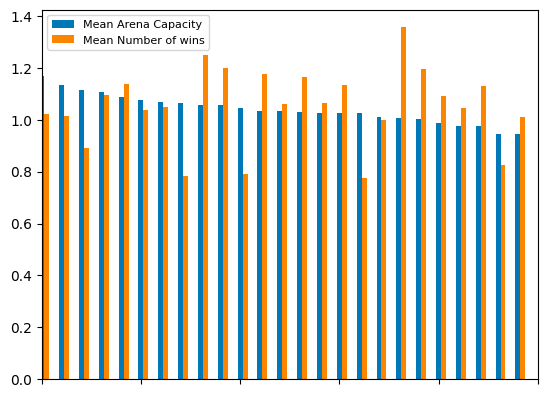

In [ ]:
# teams with most wins
teams_grp = games_df.groupby(['HOME_TEAM_ID','HOME_TEAM_WINS'])
most_win_table = teams_grp['HOME_TEAM_WINS'].size().unstack(fill_value=0)
teams_df.sort_values(by='TEAM_ID',ascending = True,inplace = True)
most_win_table.sort_values(by='HOME_TEAM_ID',ascending = True,inplace = True)
most_win_table['NAME'] = teams_df['NICKNAME'].values
most_win_table['ARENA_CAP'] = teams_df['ARENACAPACITY'].values
most_win_table.sort_values(by='ARENA_CAP',ascending = False,inplace = True)

# got the most wins gotten by an NBA team since 2003 (most_win_table)
most_win_table['MEAN_ARENA_CAP']=[x/18553.31 for x in most_win_table['ARENA_CAP']]
most_win_table['MEAN_WINS']=[x/505.17 for x in most_win_table[1]]

# 18553.31 mean number of arena capacity
# average wins per team is 505.17 wins

#plot of the relation of arena capacity to number of wins
ti = [x for x in range(30)]
hor = np.arange(len(ti))

x = [x for x in most_win_table['MEAN_ARENA_CAP']]
y = [x for x in most_win_table['MEAN_WINS']]

plt.bar(ti,x,width = 0.25,color = '#0077b6',label = 'Mean Arena Capacity')
plt.bar(hor + 0.25,y,width = 0.25,color = '#fb8500',label = 'Mean Number of wins')

plt.xlim(0,25)
plt.xticks(color='w')
plt.legend(loc = 'upper left',fontsize = 8)

We may conclude that there is no association between stadium capacity and winnings based on the graph above, which shows that certain arenas with bigger capacities have lesser wins than others with lower capacity. On the other hand, low capacity arenas have more victories.

# **Results and Conclusions**
1. When teams play in their home arenas, their chances of winning are higher.
2. A team is more likely to win if it has more assists than when it has more rebounds, field goals made, three-pointers made, and free throw %, in that order.
3. Teams that have won at home have the same statistics as those that have won away; the same is true for teams that have lost both at home and away.
4. The capacity of the arena has little bearing on the likelihood of a team winning.
